In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df1=pd.read_csv('siconv_programa.csv',sep=';',usecols=['COD_ORGAO_SUP_PROGRAMA','COD_PROGRAMA','ID_PROGRAMA','NOME_PROGRAMA'])

In [4]:
df2=pd.read_csv('siconv_programa_proposta.csv',sep=';')

In [5]:
df1.groupby(['ID_PROGRAMA','COD_ORGAO_SUP_PROGRAMA']).size()#['COD_ORGAO_SUP_PROGRAMA']

ID_PROGRAMA  COD_ORGAO_SUP_PROGRAMA
1203         54000                      81
1204         54000                      81
1205         54000                      54
1206         54000                      81
1207         32000                      27
1208         32000                      27
1209         32000                      27
1210         32000                      27
1211         32000                      27
1212         32000                      27
1213         32000                      27
1214         32000                      27
1215         32000                      27
1216         32000                      27
1217         20000                      81
1218         20000                      81
1219         20000                      81
1220         20000                      81
1221         44000                      81
1222         20000                      81
1223         44000                      81
1224         44000                      81
1225         44000

In [6]:
df1.drop_duplicates(subset='ID_PROGRAMA', keep="last",inplace=True)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41918 entries, 26 to 852281
Data columns (total 4 columns):
COD_ORGAO_SUP_PROGRAMA    41918 non-null int64
ID_PROGRAMA               41918 non-null int64
COD_PROGRAMA              41918 non-null int64
NOME_PROGRAMA             41918 non-null object
dtypes: int64(3), object(1)
memory usage: 1.6+ MB


In [8]:
df3=df2.merge(df1,on='ID_PROGRAMA')

In [9]:
print(df2.shape,df1.shape,df3.shape)

(846743, 2) (41918, 4) (846743, 5)


In [10]:
df3.head()

,ID_PROGRAMA,ID_PROPOSTA,COD_ORGAO_SUP_PROGRAMA,COD_PROGRAMA,NOME_PROGRAMA
0,30607,958530,30000,3000020150008,Defesa dos Direitos Difusos
1,30607,977895,30000,3000020150008,Defesa dos Direitos Difusos
2,30607,965094,30000,3000020150008,Defesa dos Direitos Difusos
3,30607,979937,30000,3000020150008,Defesa dos Direitos Difusos
4,30607,982900,30000,3000020150008,Defesa dos Direitos Difusos


In [11]:
df4=pd.read_csv('OBRAS_ATRASADA_INFO1.csv')

In [12]:
df4=pd.merge(df3,df4,on='ID_PROPOSTA')

In [13]:
df4[(df4.COD_ORGAO_SUP_PROGRAMA==20000)].head()

,ID_PROGRAMA,ID_PROPOSTA,COD_ORGAO_SUP_PROGRAMA,COD_PROGRAMA,NOME_PROGRAMA,NR_CONVENIO,MES,ANO,DIA_INIC_VIGENC_CONV,DIA_FIM_VIGENC_CONV,DIA_FIM_VIGENC_ORIGINAL_CONV,VL_GLOBAL_CONV,VL_CONTRAPARTIDA_CONV,TIPO_DESPESA_ITEM,UF_PROPONENTE,COD_MUNIC_IBGE,DIAS_ATRASO_INT,DIAS_OBRA_INT,DIAS_ATRASO_REL
32156,39614,291637,20000,2012420100018,Emenda Parlamentar 25340001 - Programa 20. 602...,755216,12.0,2010.0,2010-12-31,2012-12-30,2011-12-30,318198.43,18198.43,OBRA,SP,3554904,366,364,1.005495
32157,39615,291637,20000,2012420100045,Emenda Parlamentar 14390017 - Programa 20. 602...,755216,12.0,2010.0,2010-12-31,2012-12-30,2011-12-30,318198.43,18198.43,OBRA,SP,3554904,366,364,1.005495
37261,13966,206946,20000,2012120100007,0152 - Sistema Nacional de Atendimento Socioed...,737298,6.0,2010.0,2010-06-29,2015-12-29,2011-12-29,8397788.14,2997788.14,OBRA,RN,2408102,1461,548,2.666058
37262,13966,248868,20000,2012120100007,0152 - Sistema Nacional de Atendimento Socioed...,751068,12.0,2010.0,2010-12-30,2014-06-20,2012-06-20,8327119.51,2327119.51,OBRA,AL,2704302,730,538,1.356877
37263,13966,362492,20000,2012120100007,0152 - Sistema Nacional de Atendimento Socioed...,752231,12.0,2010.0,2010-12-30,2014-12-30,2012-09-28,6698000.00,698000.00,OBRA,MA,2111300,823,638,1.289969


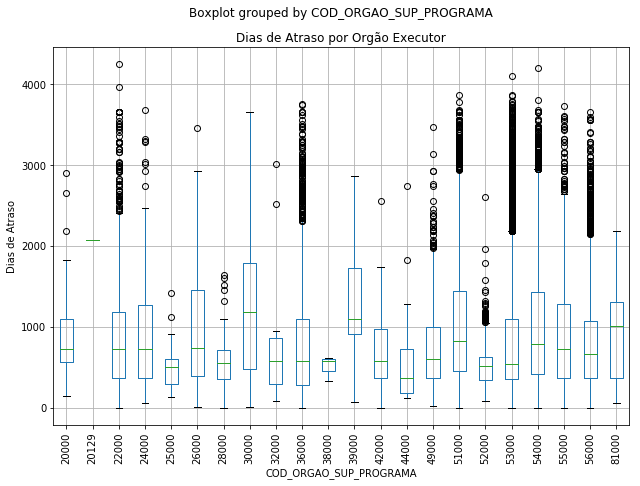

In [14]:
df4.boxplot(column='DIAS_ATRASO_INT',by='COD_ORGAO_SUP_PROGRAMA',rot=90,figsize=[10,7])
plt.title('Dias de Atraso por Orgão Executor')
plt.ylabel('Dias de Atraso')
plt.savefig('DIAS_DE_ATRASO_ORGAO_EXECUTOR_BOXPLOT.png')

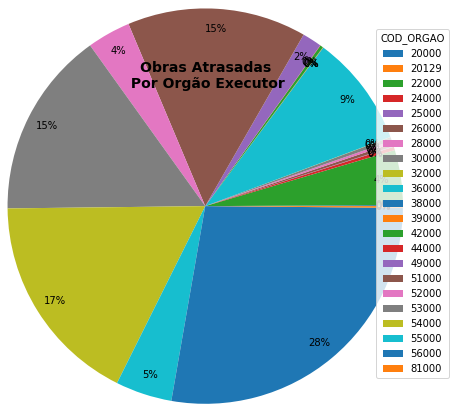

<Figure size 432x288 with 0 Axes>

In [15]:


plt.gca().axis("equal")
pie = plt.pie(df4.groupby(['COD_ORGAO_SUP_PROGRAMA']).size(), startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=2.2)

plt.title('Obras Atrasadas\n Por Orgão Executor', weight='bold', size=14)
plt.legend(pie[0],df4.groupby(['COD_ORGAO_SUP_PROGRAMA']).size().index, bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure,title='COD_ORGAO')
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.savefig('RELAÇÂO_ORGAO_EXECUTOR_OBRAS_ATRASADAS_PIE',bbox_inches="tight")

plt.show()
plt.clf()


In [16]:
df5=pd.read_csv('OBRAS_TOTAIS_CONV_IND_ATRASO.csv',index_col=0)
df5.head()

,NR_CONVENIO,ID_PROPOSTA,MES,ANO,DIA_INIC_VIGENC_CONV,DIA_FIM_VIGENC_CONV,DIA_FIM_VIGENC_ORIGINAL_CONV,VL_GLOBAL_CONV,VL_CONTRAPARTIDA_CONV,ATRASADA
0,700122,4493,12.0,2008.0,2008-12-22,2010-05-31,2010-05-31,201430.00,20143.00,0.0
1,700338,5166,12.0,2008.0,2008-12-29,2014-12-29,2011-06-28,320000.00,80000.00,1.0
2,700369,12297,11.0,2008.0,2008-11-25,2009-11-25,2009-11-25,8987594.97,1158344.97,0.0
3,700617,16386,12.0,2008.0,2009-01-02,2010-01-01,2010-01-01,105000.00,5000.00,0.0
4,700626,17236,NaN,NaN,2008-12-31,2011-12-31,2011-12-31,421052.63,21052.63,0.0


In [17]:
df5=pd.merge(df3,df5,on='ID_PROPOSTA')

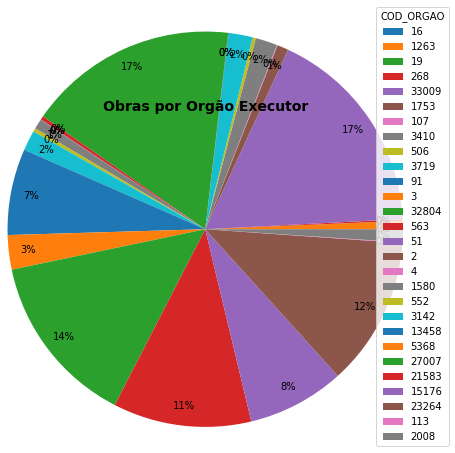

<Figure size 432x288 with 0 Axes>

In [18]:
plt.gca().axis("equal")
pie = plt.pie(df5.groupby(['COD_ORGAO_SUP_PROGRAMA']).size(), startangle=0, autopct='%1.0f%%', pctdistance=0.9, radius=2.2)

plt.title('Obras por Orgão Executor', weight='bold', size=14)
plt.legend(pie[0],df5.groupby(['COD_ORGAO_SUP_PROGRAMA']).size(), bbox_to_anchor=(1,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure,title='COD_ORGAO')
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.85)
plt.savefig('RELAÇÂO_ORGAO_EXECUTOR_OBRAS_TODAS_PIE',bbox_inches="tight")

plt.show()
plt.clf()

In [19]:
df6=pd.read_csv('siconv_consorcios.csv',sep=';')

In [20]:
df6['NUM_EMPRESAS_CONV'] = df6.groupby(['ID_PROPOSTA'])['CNPJ_PARTICIPANTE'].transform('count')


In [21]:
df7=pd.read_csv('siconv_meta_crono_fisico.csv',sep=';')
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1183981 entries, 0 to 1183980
Data columns (total 17 columns):
ID_META                  1183981 non-null int64
ID_PROPOSTA              1183981 non-null int64
NR_CONVENIO              326366 non-null float64
COD_PROGRAMA             1176704 non-null float64
NOME_PROGRAMA            1176704 non-null object
NR_META                  1183981 non-null int64
TIPO_META                1183981 non-null object
DESC_META                1183981 non-null object
DATA_INICIO_META         1183538 non-null object
DATA_FIM_META            1183538 non-null object
UF_META                  866183 non-null object
MUNICIPIO_META           866183 non-null object
ENDERECO_META            743309 non-null object
CEP_META                 755354 non-null object
QTD_META                 1071764 non-null object
UND_FORNECIMENTO_META    1073556 non-null object
VL_META                  1183926 non-null object
dtypes: float64(2), int64(3), object(12)
memory usage: 153.6

In [22]:
df7[list(df7.filter(like='DATA'))]=df7[list(df7.filter(like='DATA'))].apply(pd.to_datetime,format='%d/%m/%Y')

In [23]:
df7['DIAS_ENTRE_METAS_INT']=df7.DATA_FIM_META-df7.DATA_INICIO_META

In [24]:
df7.DIAS_ENTRE_METAS_INT=pd.to_numeric(df7.DIAS_ENTRE_METAS_INT.dt.days)

In [25]:
df7['MEDIA_DIAS_ENTRE_META_PROP']=df7.groupby(['ID_PROPOSTA'])['DIAS_ENTRE_METAS_INT'].transform('mean')

In [26]:
df7['QTD_METAS']=df7.groupby(['ID_PROPOSTA'])['ID_PROPOSTA'].transform('count')
df7.head()

,ID_META,ID_PROPOSTA,NR_CONVENIO,COD_PROGRAMA,NOME_PROGRAMA,NR_META,TIPO_META,DESC_META,DATA_INICIO_META,DATA_FIM_META,UF_META,MUNICIPIO_META,ENDERECO_META,CEP_META,QTD_META,UND_FORNECIMENTO_META,VL_META,DIAS_ENTRE_METAS_INT,MEDIA_DIAS_ENTRE_META_PROP,QTD_METAS
0,245166,126933,NaN,5.600020e+12,\t PROGRAMA 0660-SEGURANÇA E EDUCAÇÃO:DIREITO ...,1,NORMAL,TERRAPLENAGEM.,2009-12-01,2010-01-01,NaN,NaN,NaN,NaN,1,UN,"223965,88",31.0,30.4,10
1,2673512,1505067,NaN,2.200020e+12,Promoção e Fortalecimento da Agricultura Familiar,1,NORMAL,Construção de Casa do Agricultor.,2019-11-07,2020-12-31,NaN,NaN,NaN,NaN,1,UN,261000,420.0,420.0,1
2,1231,1188,NaN,4.400020e+12,"Prevenção e Combate ao Desmatamento, Queimadas...",1,NORMAL,Aquisição de Viatura de Transporte e Apoio Log...,2008-12-01,2009-12-31,MS,CAMPO GRANDE,"Fernando Augusto correa da Costa,376 Jd Amáric...",79080-790,NaN,NaN,550000,395.0,395.0,1
3,2673615,1505068,NaN,2.200020e+12,Promoção e Fortalecimento da Agricultura Familiar,1,NORMAL,Aquisição de Caminhão e Retroescavadeira Novos,2019-11-07,2020-12-31,PR,JARDIM ALEGRE,"Praça Mariana Leite Felix, 800",86860-000,1,UN,430000,420.0,420.0,1
4,1233,1193,NaN,4.400020e+12,Resíduos Sólidos Urbanos,1,NORMAL,Obras civis (construção e ampliação),2008-08-05,2008-12-08,PR,PARANAVAI,"Rua Pioneiro Francisco R. Vitoriano, 1667",87700-000,NaN,NaN,150000,125.0,113.5,2


In [27]:
df7=pd.merge(df5,df6[['ID_PROPOSTA','NUM_EMPRESAS_CONV']],on='ID_PROPOSTA').merge(df7[['ID_PROPOSTA','MEDIA_DIAS_ENTRE_META_PROP','QTD_METAS']])

In [28]:
df7.to_csv('OBRAS_TOTAIS_INFO1.csv',index=False)

In [29]:
df7[(df7.ATRASADA==1)].to_csv('OBRAS_ATRASADA_INFO2.csv',index=False)

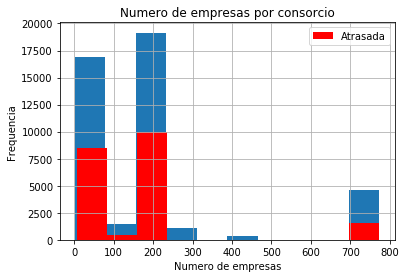

In [48]:

df7['NUM_EMPRESAS_CONV'].hist()
df7[(df7.ATRASADA==1)]['NUM_EMPRESAS_CONV'].hist(color='red',label='Atrasada')
plt.ylabel('Frequencia')
plt.xlabel('Numero de empresas')
plt.title('Numero de empresas por consorcio')
plt.legend()
plt.savefig('NUM_EMPRESAS_CONS.png')

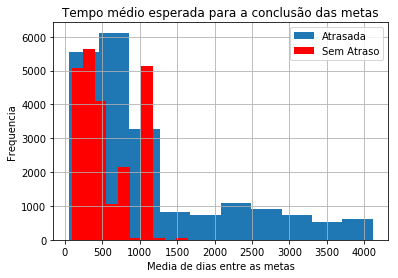

In [49]:
df7[(df7.ATRASADA==1)]['MEDIA_DIAS_ENTRE_META_PROP'].hist(label='Atrasada')
df7[(df7.ATRASADA==0)]['MEDIA_DIAS_ENTRE_META_PROP'].hist(color='red',label='Sem Atraso')
plt.ylabel('Frequencia')
plt.legend()
plt.xlabel('Media de dias entre as metas')
plt.title('Tempo médio esperada para a conclusão das metas')
plt.savefig('MED_TEMPO_METAS.png')

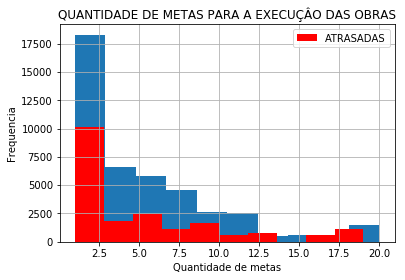

In [50]:
df7['QTD_METAS'].hist()
df7[(df7.ATRASADA==1)]['QTD_METAS'].hist(label='ATRASADAS',color='red')
plt.xlabel('Quantidade de metas')
plt.ylabel('Frequencia')
plt.title('QUANTIDADE DE METAS PARA A EXECUÇÂO DAS OBRAS')
plt.legend()
plt.savefig('QTD_METAS.png')